<a href="https://colab.research.google.com/github/Medynal/thing/blob/main/movie_web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
url= 'https://www.filmcrave.com/list_top_movie.php'
next_page= url + '?page=2'
response= requests.get(url)
soup= BeautifulSoup(response.content, 'html.parser')

In [29]:
def get_info(soup):
  all_movies= []
  trank_pattern = r'(\d+)\.\s*(.+)'
  for h2 in soup.find_all('h2', class_="large"):
    one_movie= {}
    title_text= h2.get_text(strip=True)
    match= re.match(trank_pattern, title_text)
    if match:
      one_movie['rank']= int(match.group(1))
      one_movie['title']= match.group(2)
    ps = []
    for sib in h2.next_siblings:
      if getattr(sib, "name", None) == "h2":
          break
      if getattr(sib, "name", None) == "p":
          ps.append(sib)
    p_pattern = r'<span class="grey-bold">([^<:]+):\s*</span>\s*(?:<span [^>]+>)?([^<]+)'
    for p in ps:
      # Split <p> content by <br/>
      lines = str(p).split('<br/>')
      for line in lines:
        match = re.search(p_pattern, line)
        if match:
          key = match.group(1).strip()
          value = match.group(2).strip()
          one_movie[key] = value
      if one_movie:
        all_movies.append(one_movie)
  return all_movies
get_info(soup)


[{'rank': 1,
  'title': 'The Shawshank Redemption',
  'Year of Release': '1994',
  'Overall Rating': '3.5 out of 4 stars',
  'Language': 'English',
  'Genre': 'Drama',
  'MPAA Rating': 'R',
  'Director': 'Frank Darabont',
  'Actors': 'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler, Clancy Brown, Gil Bellows',
  'Plot': "A young banker named Andy, has his life changed rapidly when he is convicted of the murder of his wife and lover, and sentenced to life in prison.  As the story unfolds, Andy shows that he is a not a typical prisoner. With the help of his friend Redd, Andy makes the most of his prison life.  The film takes place in the 1940's."},
 {'rank': 2,
  'title': 'Fight Club',
  'Year of Release': '1999',
  'Overall Rating': '3.3 out of 4 stars',
  'Language': 'English',
  'Genre': 'Drama/Crime',
  'MPAA Rating': 'R',
  'Director': 'David Fincher',
  'Actors': 'Edward Norton, Brad Pitt, Helena Bonham Carter, Meat Loaf, Zach Grenier',
  'Plot': 'An average thirty-somethin

In [30]:
final_movies= []
for pg in range(1, 101):
  url = f"https://www.filmcrave.com/list_top_movie.php?page={pg}" if pg > 1 else "https://www.filmcrave.com/list_top_movie.php"
  try:
    response= requests.get(url)
    soup= BeautifulSoup(response.content, 'html.parser')
    movies_info= get_info(soup)
    final_movies.extend(movies_info)
    print(f'Page {pg}: found {len(movies_info)} moivies')
  except requests.exceptions.HTTPError as e:
      print(f"Page {pg} not found. Stopping further requests.")
      break
#print(movies_info)





Page 1: found 10 moivies
Page 2: found 10 moivies
Page 3: found 10 moivies
Page 4: found 10 moivies
Page 5: found 10 moivies
Page 6: found 10 moivies
Page 7: found 10 moivies
Page 8: found 10 moivies
Page 9: found 10 moivies
Page 10: found 10 moivies
Page 11: found 10 moivies
Page 12: found 10 moivies
Page 13: found 10 moivies
Page 14: found 10 moivies
Page 15: found 10 moivies
Page 16: found 10 moivies
Page 17: found 10 moivies
Page 18: found 10 moivies
Page 19: found 10 moivies
Page 20: found 10 moivies
Page 21: found 10 moivies
Page 22: found 10 moivies
Page 23: found 10 moivies
Page 24: found 10 moivies
Page 25: found 10 moivies
Page 26: found 10 moivies
Page 27: found 10 moivies
Page 28: found 10 moivies
Page 29: found 10 moivies
Page 30: found 10 moivies
Page 31: found 10 moivies
Page 32: found 10 moivies
Page 33: found 10 moivies
Page 34: found 10 moivies
Page 35: found 10 moivies
Page 36: found 10 moivies
Page 37: found 10 moivies
Page 38: found 10 moivies
Page 39: found 10 moi

In [31]:
with open('films.csv', 'w') as films:
  writer= csv.DictWriter(films, fieldnames=['rank','title','year_of_release', 'overall_rating', 'language', 'genre', 'mpaa_rating', 'director', 'actors', 'plot'])
  writer.writeheader()
  for i in final_movies:
      writer.writerow( {'rank': i.get('rank'),'title':i.get('title'), 'year_of_release': i.get('Year of Release', ''), 'overall_rating': i.get('Overall Rating', ''),'language': i.get('Language', ''), 'genre': i.get('Genre', ''), 'mpaa_rating': i.get('MPAA Rating', ''),'director': i.get('Director', ''), 'actors': i.get('Actors', ''), 'plot': i.get('Plot', '')})
      print("Done!")


Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done

In [32]:
movies_df= pd.DataFrame(final_movies).set_index('rank')
movies_df.head()


,title,Year of Release,Overall Rating,Language,Genre,MPAA Rating,Director,Actors,Plot
rank,,,,,,,,,
1,The Shawshank Redemption,1994,3.5 out of 4 stars,English,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","A young banker named Andy, has his life change..."
2,Fight Club,1999,3.3 out of 4 stars,English,Drama/Crime,R,David Fincher,"Edward Norton, Brad Pitt, Helena Bonham Carter...",An average thirty-something office worker gets...
3,The Godfather,1972,3.5 out of 4 stars,English,Drama/Crime,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",An organized crime leader gives up control of ...
4,The Dark Knight,2008,3.4 out of 4 stars,English,Action/Adventure,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Batman raises the stakes in his war on crime. ...
5,Pulp Fiction,1994,3.4 out of 4 stars,English,Crime/Drama,R,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Bruce Willis...",A story of four interweaving stories developin...


In [33]:
movies_df.shape
print('\nColumn information')
movies_df.info()
print('\nMissing Values')
movies_df.isna().sum()





Column information
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1000 non-null   object
 1   Year of Release  1000 non-null   object
 2   Overall Rating   1000 non-null   object
 3   Language         999 non-null    object
 4   Genre            1000 non-null   object
 5   MPAA Rating      998 non-null    object
 6   Director         1000 non-null   object
 7   Actors           996 non-null    object
 8   Plot             959 non-null    object
dtypes: object(9)
memory usage: 78.1+ KB

Missing Values


,0
title,0
Year of Release,0
Overall Rating,0
Language,1
Genre,0
MPAA Rating,2
Director,0
Actors,4
Plot,41


In [34]:
movies_df.columns= movies_df.columns.str.strip().str.lower().str.replace(' ', '_')
#convert overall rating to float
rating_p= r'(\d+\.\d+)'
movies_df['overall_rating']= movies_df['overall_rating'].astype(str).str.extract(rating_p)
movies_df['overall_rating']= movies_df['overall_rating'].astype(float)
#convert year of release to int
movies_df['year_of_release']= movies_df['year_of_release'].astype(int)
#creating missing values
mismovie_df= movies_df.copy()
mismovie_df.loc[mismovie_df.sample(frac= 0.05).index, 'language']= np.nan
mismovie_df.isna().sum()


,0
title,0
year_of_release,0
overall_rating,0
language,50
genre,0
mpaa_rating,2
director,0
actors,4
plot,41


In [35]:
#filling missing values
cols= ['language', 'mpaa_rating','actors', 'plot']
for col in cols:
  mismovie_df[col]= mismovie_df[col].fillna(mismovie_df[col].mode()[0])
#mismovie_df.isna().sum()
mismovie_df.to_csv('filmcrave_cleaned.csv')


In [36]:
#Data Visualisation
plt.style.use('ggplot')

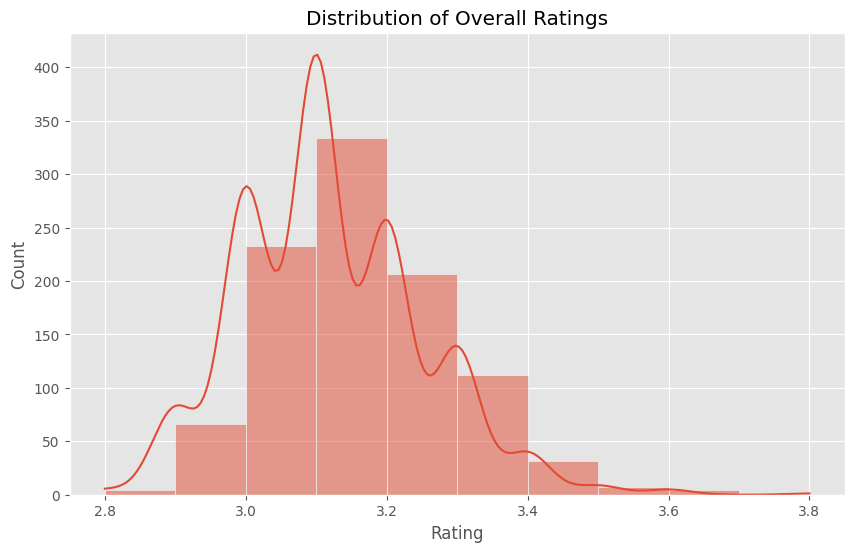

In [37]:
#rating distribution
plt.figure(figsize=(10,6))
sns.histplot(mismovie_df["overall_rating"], bins=10, kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

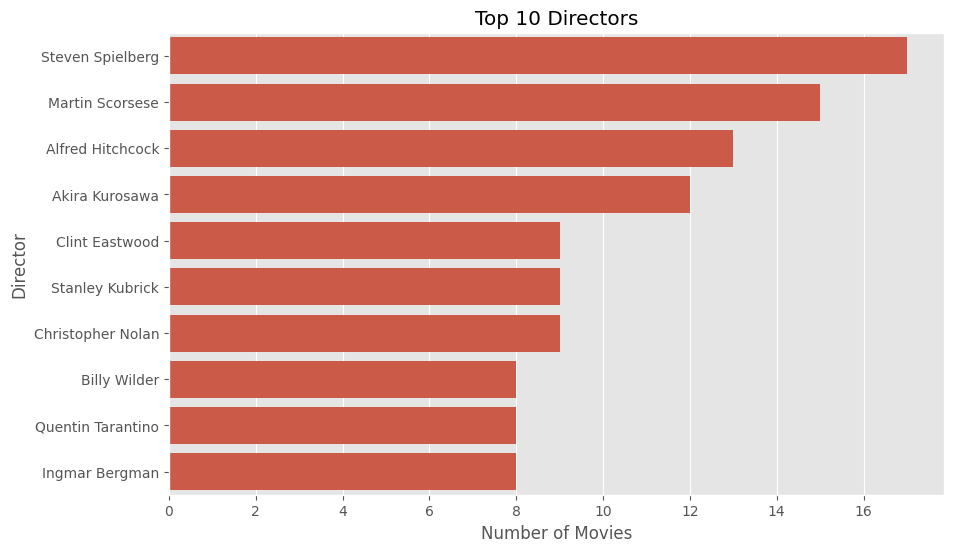

In [38]:
#Which directors appear most often?
plt.figure(figsize=(10,6))
top_directors = mismovie_df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

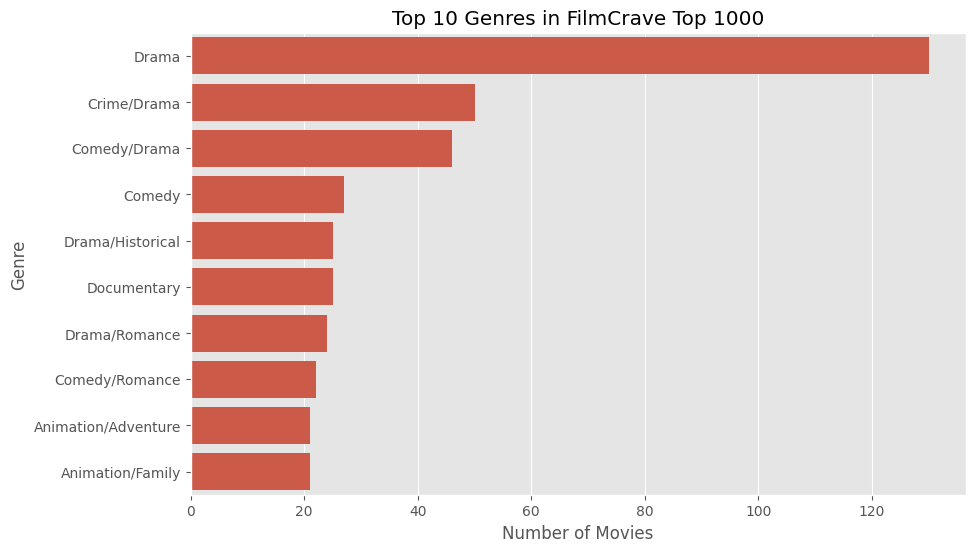

In [39]:
#Top 10 genre
plt.figure(figsize=(10,6))
top_genres = mismovie_df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres in FilmCrave Top 1000")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


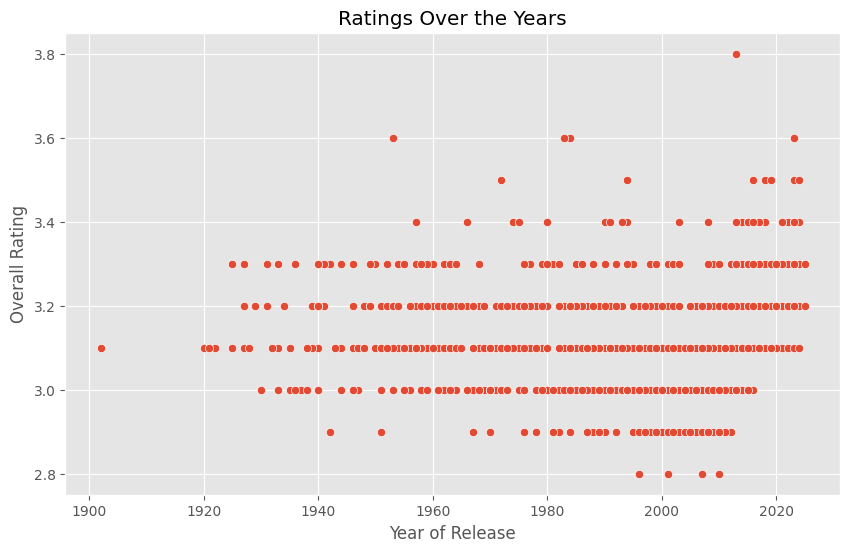

In [40]:
#Year vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x="year_of_release", y="overall_rating", data=mismovie_df)
plt.title("Ratings Over the Years")
plt.xlabel("Year of Release")
plt.ylabel("Overall Rating")
plt.show()

Which decades produced the most acclaimed movies?
Do newer films receive higher ratings than older ones?
Are certain genres (e.g., Drama, Thriller) more likely to appear in the Top 1000?
What languages dominate the global cinema landscape?
Who are the most frequent directors in top-rated films?

    decade  overall_rating
10    2010             3.8


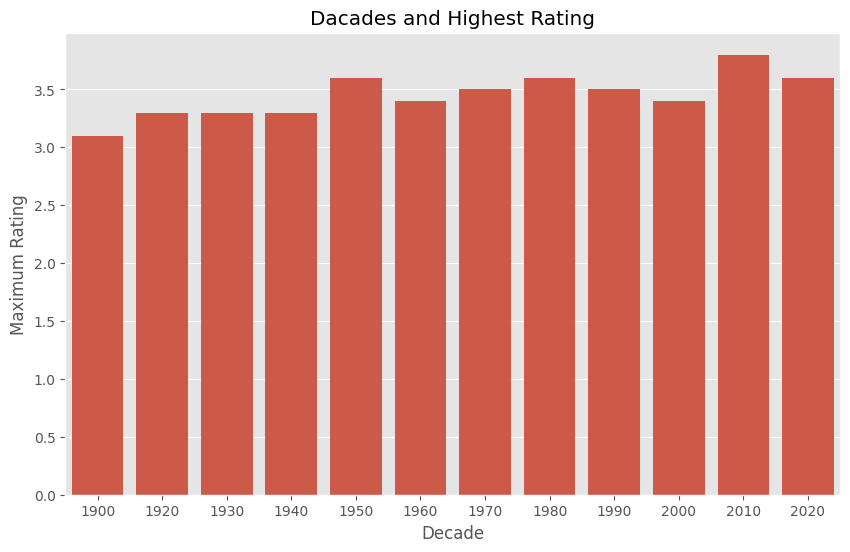

In [41]:
#Which decades produced the most acclaimed movies?
n= np.sort(mismovie_df['year_of_release'].unique())
mismovie_df['decade']= (mismovie_df['year_of_release']//10)*10
mismovie_acc= mismovie_df.groupby('decade')['overall_rating'].max().reset_index()
mismovie_acc= mismovie_acc.sort_values(by='overall_rating', ascending= False)
print(mismovie_acc.head(1))

plt.figure(figsize=(10,6))
sns.barplot(x= mismovie_acc['decade'], y= mismovie_acc['overall_rating'])
plt.title("Dacades and Highest Rating")
plt.xlabel("Decade")
plt.ylabel("Maximum Rating")
plt.show()

     year_of_release  overall_rating  count
329             2013             3.8      1
263             1983             3.6      1
264             1984             3.6      1
326             1953             3.6      1
359             2023             3.6      1
230             2019             3.5      1
241             1994             3.5      1
294             1972             3.5      1
354             2016             3.5      1
356             2018             3.5      1
358             2023             3.5      1
364             2024             3.5      1
66              2016             3.4      4
115             2015             3.4      3
124             2023             3.4      3
125             2017             3.4      3
169             2024             3.4      2
212             2021             3.4      2
235             2022             3.4      1
239             1993             3.4      1


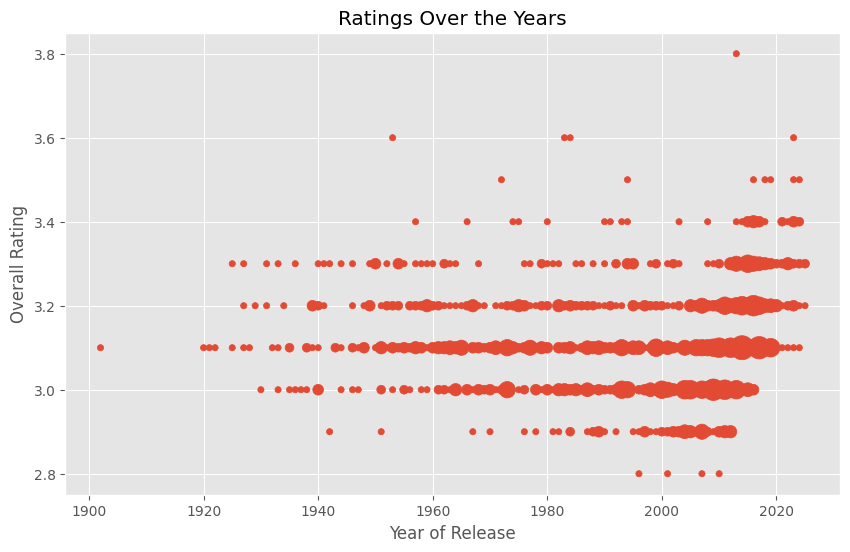

In [42]:
#Do newer films receive higher ratings than older ones?
mismovie_r= mismovie_df[['year_of_release','overall_rating']].value_counts().reset_index()
mismovie_r= mismovie_r.sort_values(by=['overall_rating','count'], ascending= False)
print(mismovie_r.head(20))

plt.figure(figsize=(10,6))
plt.scatter(x=mismovie_r['year_of_release'], y=mismovie_r['overall_rating'], s=mismovie_r['count']*20)
plt.title("Ratings Over the Years")
plt.xlabel("Year of Release")
plt.ylabel("Overall Rating")
plt.show()

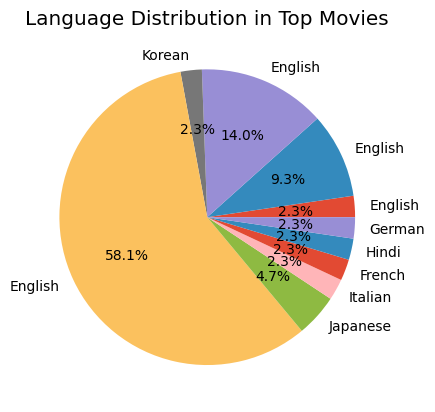

In [43]:
#Language distribution in top movies
mismovie_l= mismovie_df[['language','overall_rating']].value_counts().reset_index()
mismovie_l= mismovie_l.sort_values(by=['overall_rating','count'], ascending= False)
mismovie_l= mismovie_l.head(10)
#np.sum(mismovie_l['count'])
plt.pie(mismovie_l['count'], labels=mismovie_l['language'], autopct='%1.1f%%')
plt.title("Language Distribution in Top Movies")
plt.show()

         genre_a  overall_rating  count
90        Action             3.8      1
86         Crime             3.6      1
93     Animation             3.6      1
95         Drama             3.6      1
100       Horror             3.6      1
76        Comedy             3.5      2
85         Drama             3.5      2
87     Biography             3.5      1
92     Animation             3.5      1
96   Documentary             3.5      1
31         Drama             3.4      9
49     Animation             3.4      5
53        Action             3.4      4
58   Documentary             3.4      4
64         Crime             3.4      3
77        Comedy             3.4      2
88     Biography             3.4      1
89     Adventure             3.4      1
108       Sci-Fi             3.4      1
110     Thriller             3.4      1


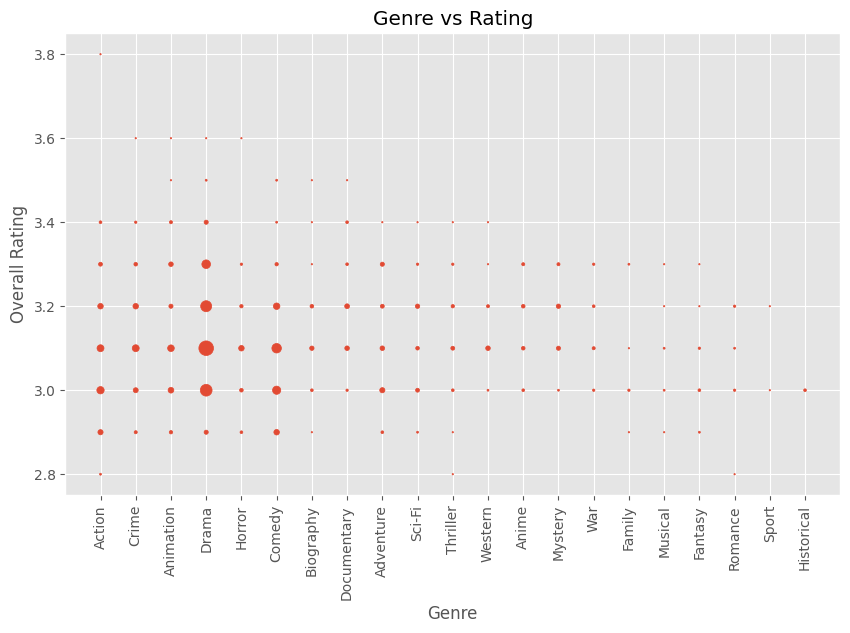

In [44]:
#Are certain genres (e.g., Drama, Thriller) more likely to appear in the Top 1000?
a= np.sort(mismovie_df['genre'].unique())
mismovie_df['genre_a']= mismovie_df['genre'].apply(lambda x: x.split('/')[0].strip())
#mismovie_df.head()
mismovie_g= mismovie_df[['genre_a', 'overall_rating']].value_counts().reset_index()
mismovie_g= mismovie_g.sort_values(['overall_rating','count'], ascending= False)
print(mismovie_g.head(20))

plt.figure(figsize=(10,6))
plt.scatter(x=mismovie_g['genre_a'], y=mismovie_g['overall_rating'], s=mismovie_g['count'])
plt.title("Genre vs Rating")
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Overall Rating")
plt.show()

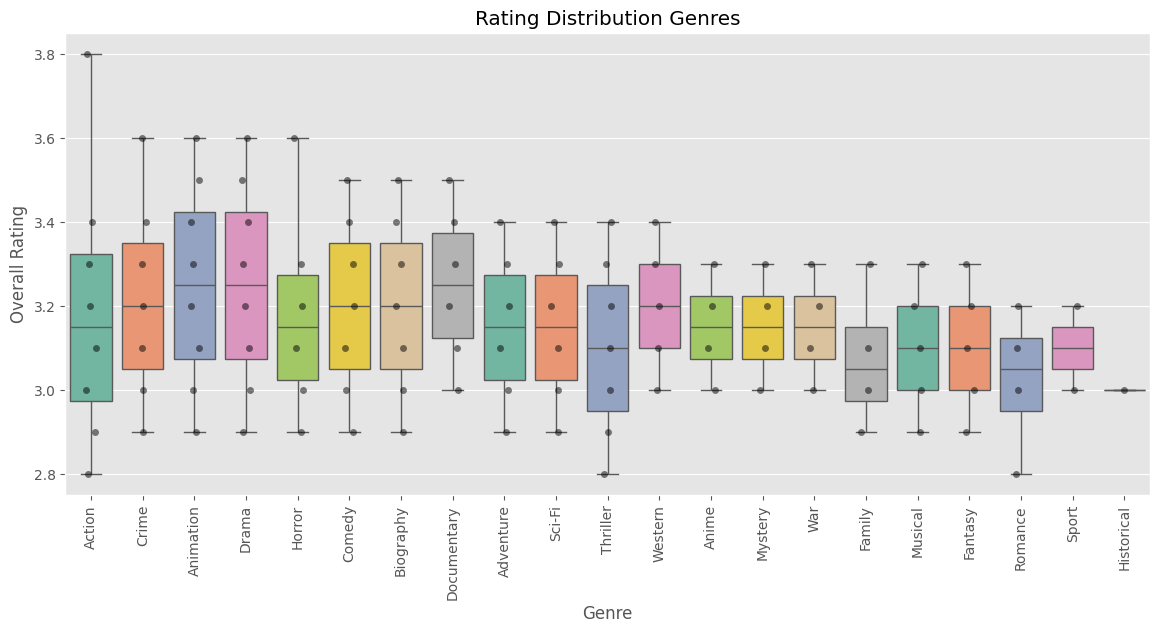

In [54]:
#Compare distributions of ratings across genres- Box plot
plt.figure(figsize=(14,6))
sns.boxplot(x='genre_a', y='overall_rating', data=mismovie_g, palette='Set2', hue='genre_a', legend=False)
sns.stripplot(x='genre_a', y='overall_rating', data=mismovie_g, color='black', alpha=0.5, jitter=True)
plt.title("Rating Distribution Genres")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Overall Rating")
plt.show()

In [ ]:
#What languages dominate the global cinema landscape?
mismovie_l= mismovie_df['language'].value_counts().reset_index()
mismovie_l= mismovie_l.sort_values('count', ascending= False)
print(mismovie_l.head(20))

plt.figure(figsize=(10,6))
plt.bar(x=mismovie_l['language'], height=mismovie_l['count'])
plt.title("Language Distribution")
plt.xlabel("Language")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()



In [ ]:
#Who are the most frequent directors in top-rated films?
mismovie_d= mismovie_df[['director', 'overall_rating']].value_counts().reset_index()
mismovie_d= mismovie_d.sort_values(['overall_rating','count'], ascending= False)
print(mismovie_d.head(20))